In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [ ]:
from zipfile import ZipFile
zip = ZipFile('/content/drive/MyDrive/Tech_seminar/Data.zip')
zip.extractall()

In [ ]:
import cv2
import subprocess
import numpy as np
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from sklearn.model_selection import train_test_split
from keras.layers import Convolution2D, MaxPooling2D
from keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau
from keras.preprocessing.image import ImageDataGenerator
import keras.backend as K
from keras.utils.vis_utils import plot_model
from keras import models
from keras.layers import LeakyReLU
from keras import layers
from keras import optimizers

In [ ]:
import cv2
import subprocess
import numpy as np
from tensorflow import keras
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Dropout, Flatten, Dense
from keras import backend as K
from keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau
from keras.regularizers import l1

In [ ]:
w, h = 128, 128
c = 3
batch_size = 16
no_epochs = 1000
validation_split = 0.2
verbosity = 1
max_norm_value = 2.0
number_of_visualizations = 6
input_shape = (w, h, c)

In [ ]:
import os
def load_dataset():
  X = list()
  Y = list()
  # for folder in os.listdir('/content/Gender/Men'):
  for filename in os.listdir('/content/Data/Train/Cat'):
    img = cv2.imread('/content/Data/Train/Cat/' + filename, cv2.IMREAD_COLOR)
    RGB_img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    RGB_img = cv2.resize(RGB_img, (w, h), cv2.INTER_AREA)
    X.append(RGB_img)
    Y.append('0')
  for filename in os.listdir('/content/Data/Train/Dog'):
    img = cv2.imread('/content/Data/Train/Dog/' + filename, cv2.IMREAD_COLOR)
    RGB_img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    RGB_img = cv2.resize(RGB_img, (w, h), cv2.INTER_AREA)
    X.append(RGB_img)
    Y.append('1')
  X = np.array(X)
  Y = np.array(Y)
  X = X.astype('float32') / 255.0
  Y = keras.utils.to_categorical(Y, 2)
  trainX, testX, trainY, testY = train_test_split(X, Y, test_size=0.2, stratify=Y, random_state=42)
  return trainX, trainY, testX, testY

In [ ]:
if K.image_data_format() == 'channels_first':
    input_shape = (3, w, h)
else:
    input_shape = (w, h, 3)

In [ ]:
import tensorflow as tf

In [ ]:
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=input_shape, kernel_regularizer=tf.keras.regularizers.l1(0.0001)))
# model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(64))#,activity_regularizer=tf.keras.regularizers.l1(0.0001)))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(2))
model.add(Activation('sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 126, 126, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 63, 63, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 61, 61, 32)        9248      
_________________________________________________________________
activation (Activation)      (None, 61, 61, 32)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 30, 30, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 28, 28, 64)        18496     
_________________________________________________________________
activation_1 (Activation)    (None, 28, 28, 64)        0

In [ ]:
from keras.utils import to_categorical
trainX, trainY, testX, testY = load_dataset()


In [ ]:
model = define_model(trainX)
model.summary()
print(len(trainX))

[0. 1.]


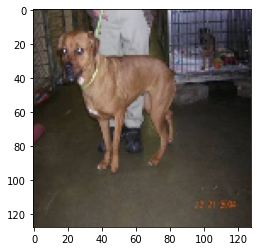

In [ ]:
import matplotlib.pyplot as plt
print(testY[1])
img1 = (testX[1] * 255).astype(np.uint8)
img1 = img1.reshape(128, 128, 3)
plt.imshow(img1)

In [ ]:
# opt = keras.optimizers.Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-8)

# model.compile(
#     optimizer=opt,
#   loss='binary_crossentropy',
#   metrics=['accuracy'])
early_stopping = EarlyStopping(patience=10, verbose=1)
model_checkpoint = ModelCheckpoint("l1_wo_dataaug1.model", verbose=1 , save_best_only=True)
reduce_lr = ReduceLROnPlateau(factor=0.1, patience=5, min_lr=0.00001, verbose=1)

In [ ]:
history = model.fit(trainX, trainY, shuffle=True, epochs=no_epochs, batch_size=16, validation_split = validation_split, callbacks=[model_checkpoint, early_stopping, reduce_lr], verbose=1)
model.save('l1_wo_dataaug1.model')

Epoch 1/1000
80/80 [==============================] - 23s 284ms/step - loss: 0.7438 - accuracy: 0.5179 - val_loss: 0.6941 - val_accuracy: 0.5656

Epoch 00001: val_loss improved from inf to 0.69410, saving model to l1_wo_dataaug1.model
INFO:tensorflow:Assets written to: l1_wo_dataaug1.model/assets
Epoch 2/1000
80/80 [==============================] - 23s 282ms/step - loss: 0.6877 - accuracy: 0.5546 - val_loss: 0.6837 - val_accuracy: 0.5875

Epoch 00002: val_loss improved from 0.69410 to 0.68365, saving model to l1_wo_dataaug1.model
INFO:tensorflow:Assets written to: l1_wo_dataaug1.model/assets
Epoch 3/1000
80/80 [==============================] - 23s 285ms/step - loss: 0.6401 - accuracy: 0.6475 - val_loss: 0.6306 - val_accuracy: 0.6219

Epoch 00003: val_loss improved from 0.68365 to 0.63062, saving model to l1_wo_dataaug1.model
INFO:tensorflow:Assets written to: l1_wo_dataaug1.model/assets
Epoch 4/1000
80/80 [==============================] - 23s 283ms/step - loss: 0.5985 - accuracy: 0.

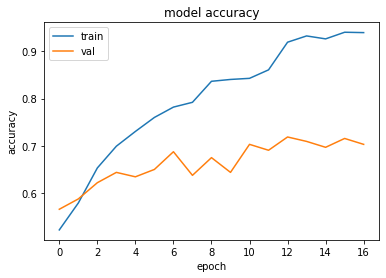

In [ ]:
# summarize history for accuracy
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

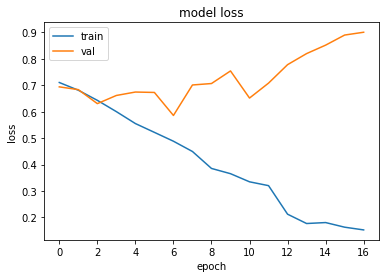

In [ ]:
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [ ]:
from tensorflow.keras.models import load_model
model1 = load_model('/content/l1_wo_dataaug1.model')
predicted_score = model1.predict(testX)
score = model1.evaluate(testX, testY)
print("test loss, test acc:", score)

13/13 [==============================] - 2s 133ms/step - loss: 0.9099 - accuracy: 0.6975
test loss, test acc: [0.9098743200302124, 0.6974999904632568]


In [ ]:
predicted_score

In [ ]:
(trainx, trainy), (testx, testy) = mnist.load_data()
# trainx = trainx.reshape((trainx.shape[0], w, h, c))
# testx = testx.reshape((testx.shape[0], w, h, c))
# # one hot encode target values
# # trainY = to_categorical(trainY)
# # testY = to_categorical(testY)
# trainx = trainx.astype('float32') / 255.0
# testx = testx.astype('float32') / 255.0


In [ ]:
img = testX[0].reshape(1, 28, 28, 1)

ValueError: ignored

In [ ]:
y = testX[0]

[[0.6197686  0.50291014]]
[1. 0.]


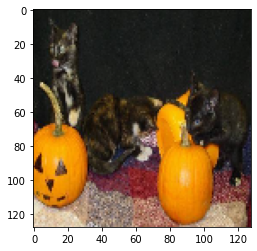

In [ ]:
n = 45
img1 = (testX[n] * 255).astype(np.uint8)
img1 = img1.reshape(128,128,3)
plt.imshow(img1)
# img = np.expand_dims(trainx[1], axis=0)
# img = img.astype('float32')
# img = testx[0].reshape(1,testx[0].shape)
img = testX[n].reshape(1, 128, 128, 3)
x = model.predict(img)
print(x)
print(testY[n])